In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(f'../data/retail_store_inventory.csv')

In [3]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [4]:
df.shape

(73100, 15)

In [5]:
df.dtypes

Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [7]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [8]:
df.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [9]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [10]:
df['Date']

0       2022-01-01
1       2022-01-01
2       2022-01-01
3       2022-01-01
4       2022-01-01
           ...    
73095   2024-01-01
73096   2024-01-01
73097   2024-01-01
73098   2024-01-01
73099   2024-01-01
Name: Date, Length: 73100, dtype: datetime64[ns]

In [11]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [12]:
numerical_features=[feature for feature in df.columns if df[feature].dtype !='O']

categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']

print(f"Numerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

Numerical Features: ['Date', 'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Holiday/Promotion', 'Competitor Pricing']
Categorical Features: ['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality']


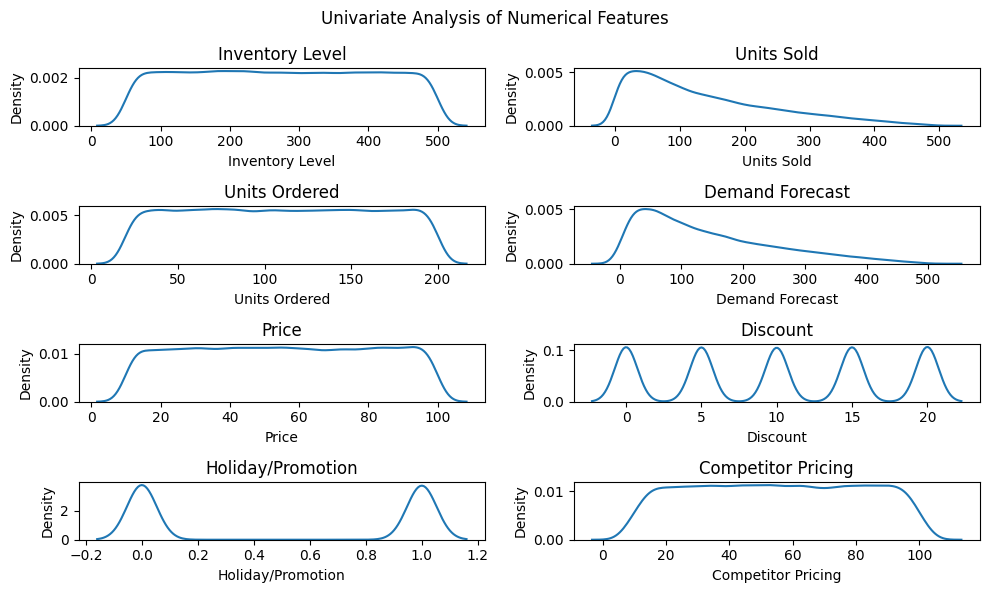

In [13]:
plt.figure(figsize=(10,6))
numerical_features.remove('Date')
plt.suptitle('Univariate Analysis of Numerical Features')
for i in range(len(numerical_features)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(df[numerical_features[i]])
    plt.title(numerical_features[i])
plt.tight_layout()
plt.show()
    

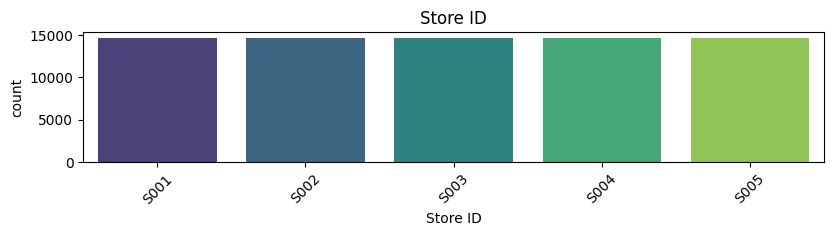

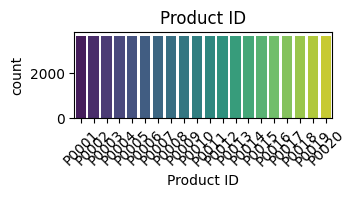

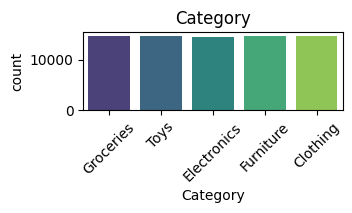

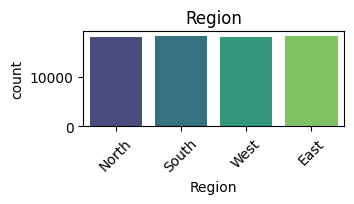

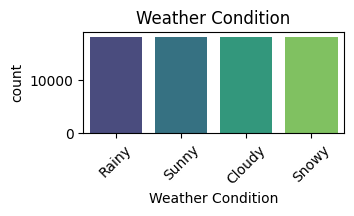

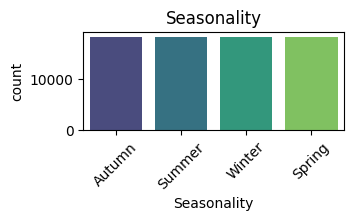

In [14]:
plt.figure(figsize=(16, 6))
for i in range(0,len(categorical_features)):
    plt.subplot(3,2, i + 1)
    sns.countplot(x=df[categorical_features[i]], palette='viridis')
    plt.title(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Text(0, 0.5, 'Units Sold')

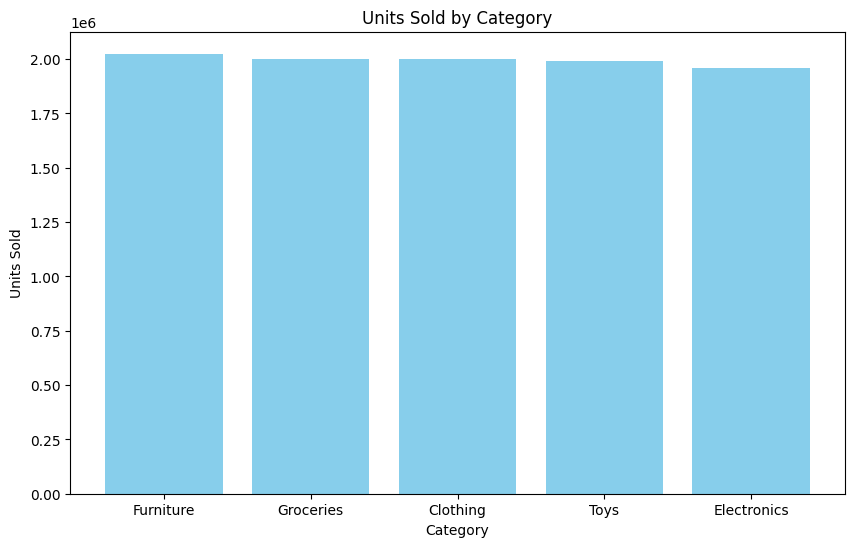

In [15]:
df1=df.copy()

category_per_unit_sold=df1.groupby('Category')['Units Sold'].sum().reset_index()
category_per_unit_sold=category_per_unit_sold.sort_values(by='Units Sold',ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(category_per_unit_sold['Category'],category_per_unit_sold['Units Sold'],color='skyblue')
plt.title('Units Sold by Category')    
plt.xlabel('Category')
plt.ylabel('Units Sold')

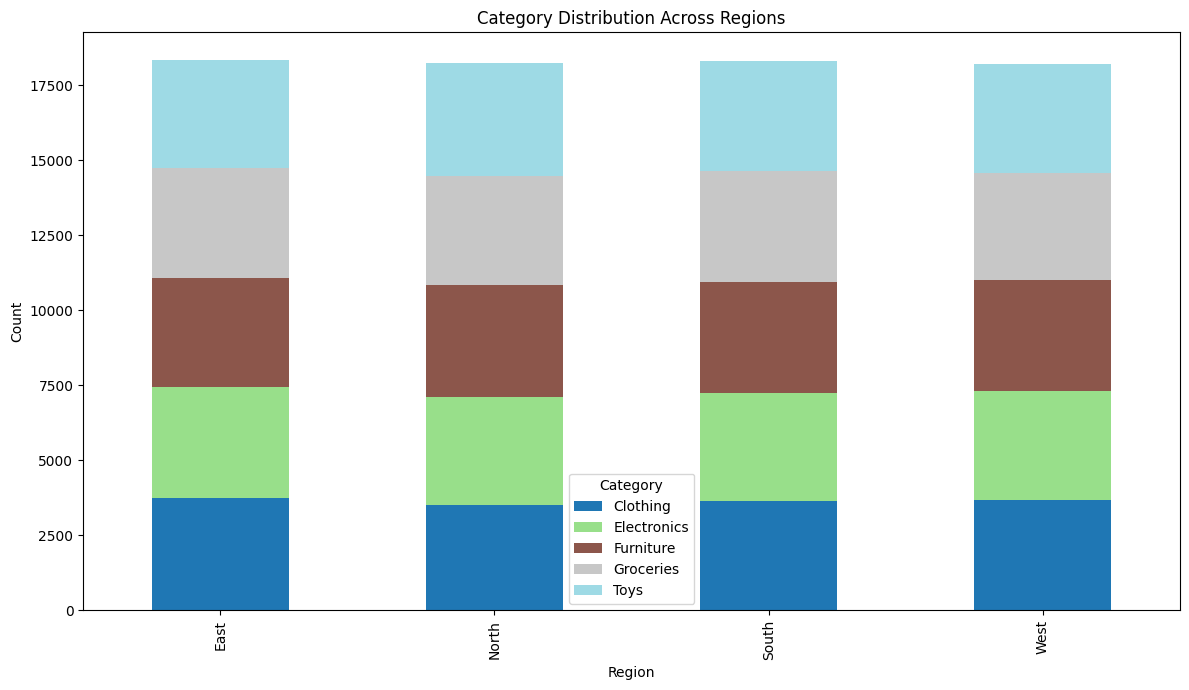

In [16]:
region_category_counts = df.groupby(['Region', 'Category']).size().unstack(fill_value=0)

region_category_counts.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
plt.title('Category Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

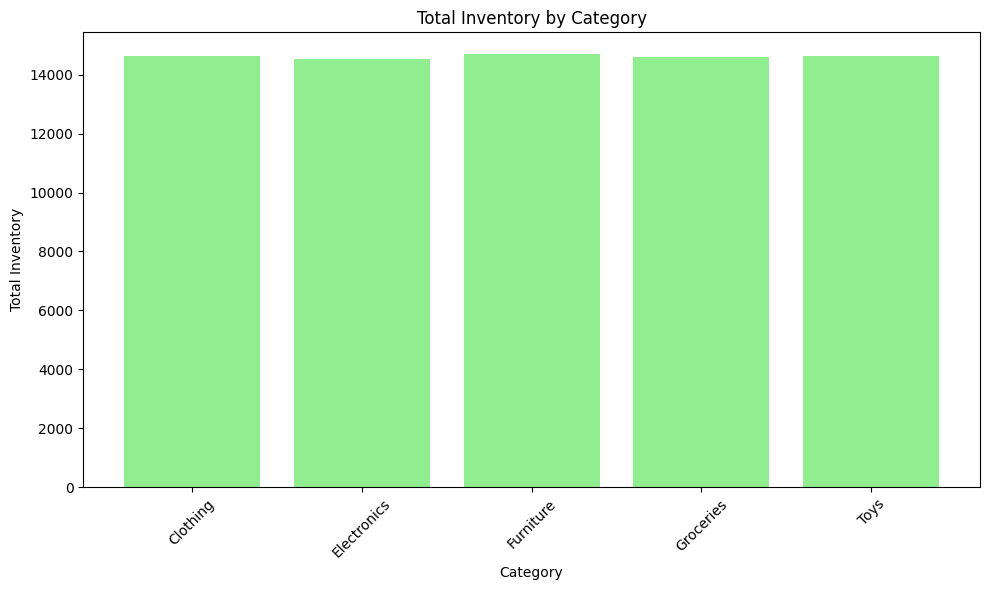

In [17]:
inventory_per_category = df.groupby('Category')['Inventory Level'].count().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(inventory_per_category['Category'], inventory_per_category['Inventory Level'], color='lightgreen')
plt.title('Total Inventory by Category')
plt.xlabel('Category')
plt.ylabel('Total Inventory')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

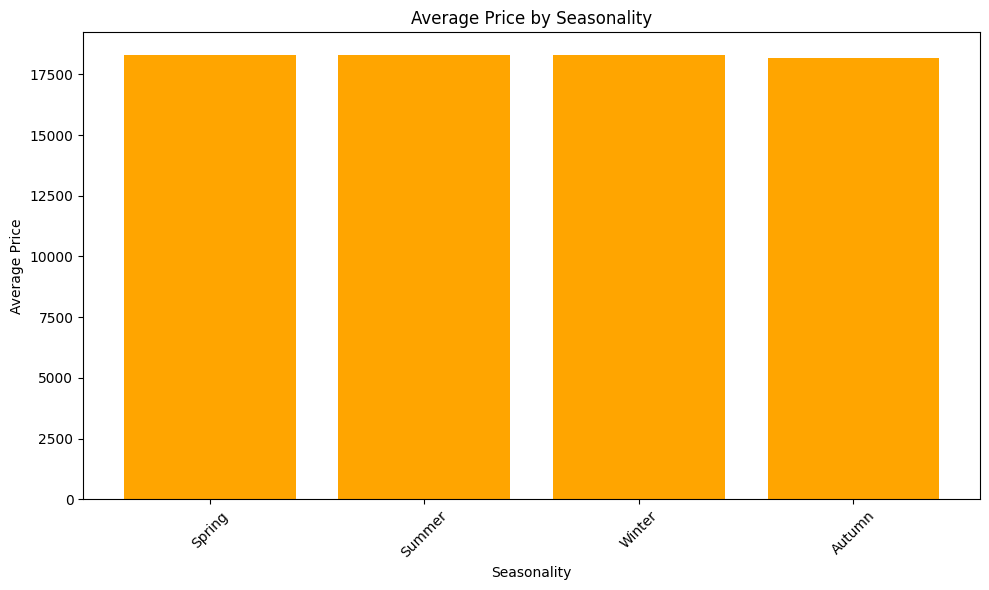

In [18]:
price_by_seasonality=df1.groupby('Seasonality')['Price'].count().reset_index()
price_by_seasonality=price_by_seasonality.sort_values(by='Price',ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(price_by_seasonality['Seasonality'],price_by_seasonality['Price'],color='orange')
plt.title('Average Price by Seasonality')  
plt.xlabel('Seasonality')
plt.ylabel('Average Price') 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


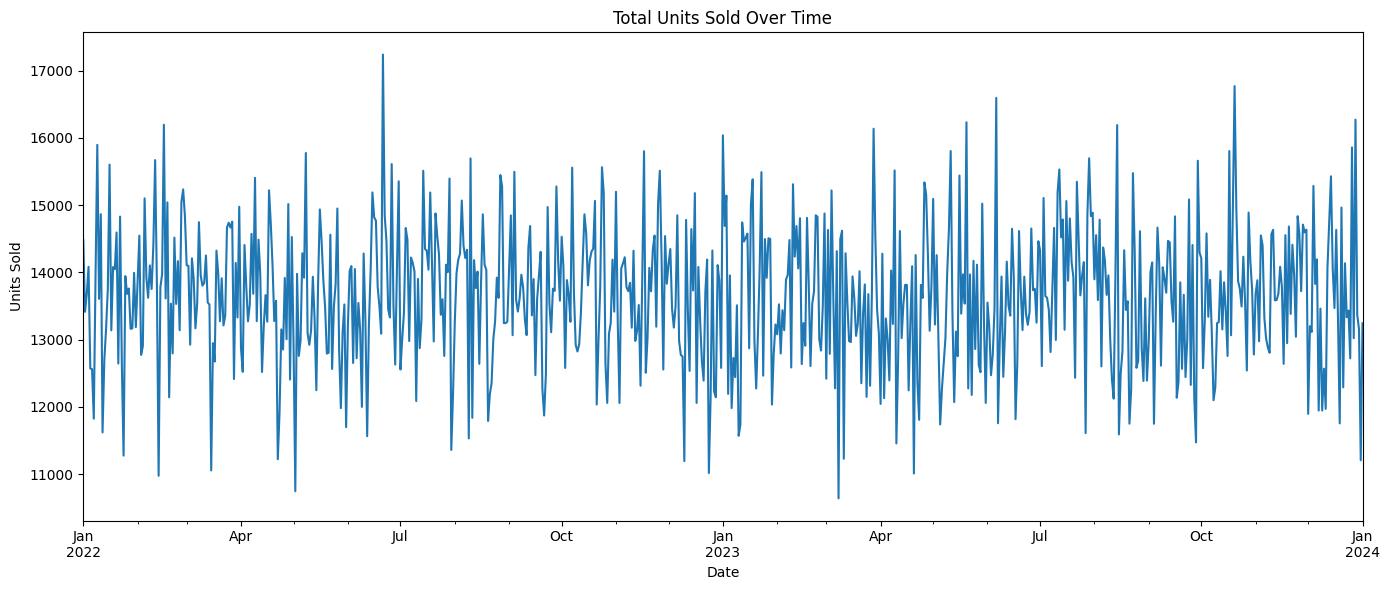

In [19]:
sales_trend = df1.groupby('Date')['Units Sold'].sum()

plt.figure(figsize=(14, 6))
sales_trend.plot()
plt.title('Total Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()

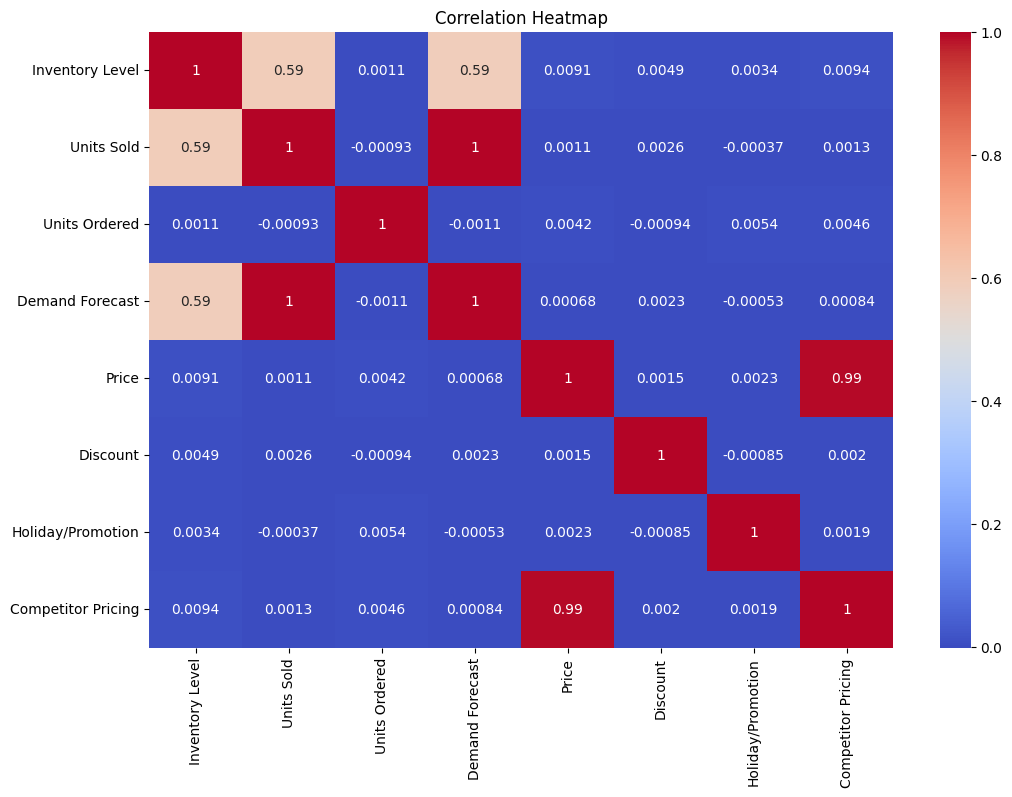

In [20]:
corr = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
# Rolling feature
df['rolling_mean_7'] = (
    df.groupby(['Product ID', 'Store ID'])['Units Sold']
    .shift(7).rolling(window=7).mean()
)

df['inventory_turnover_ratio'] = df['Units Sold'] / (df['Inventory Level'] + 1e-6)
df['order_to_sales_ratio'] = df['Units Ordered'] / (df['Units Sold'] + 1e-6)
df['price_discount_interaction'] = df['Price'] * df['Discount']
# Lag features
df['lag_7'] = df.groupby(['Product ID', 'Store ID'])['Units Sold'].shift(7)
df['lag_14'] = df.groupby(['Product ID', 'Store ID'])['Units Sold'].shift(14)

# Fill missing values
df = df.fillna(df.median(numeric_only=True))


df.drop(['Demand Forecast'], axis=1, errors='ignore', inplace=True)

In [22]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 17


In [23]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 6


In [24]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 4


In [25]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 13


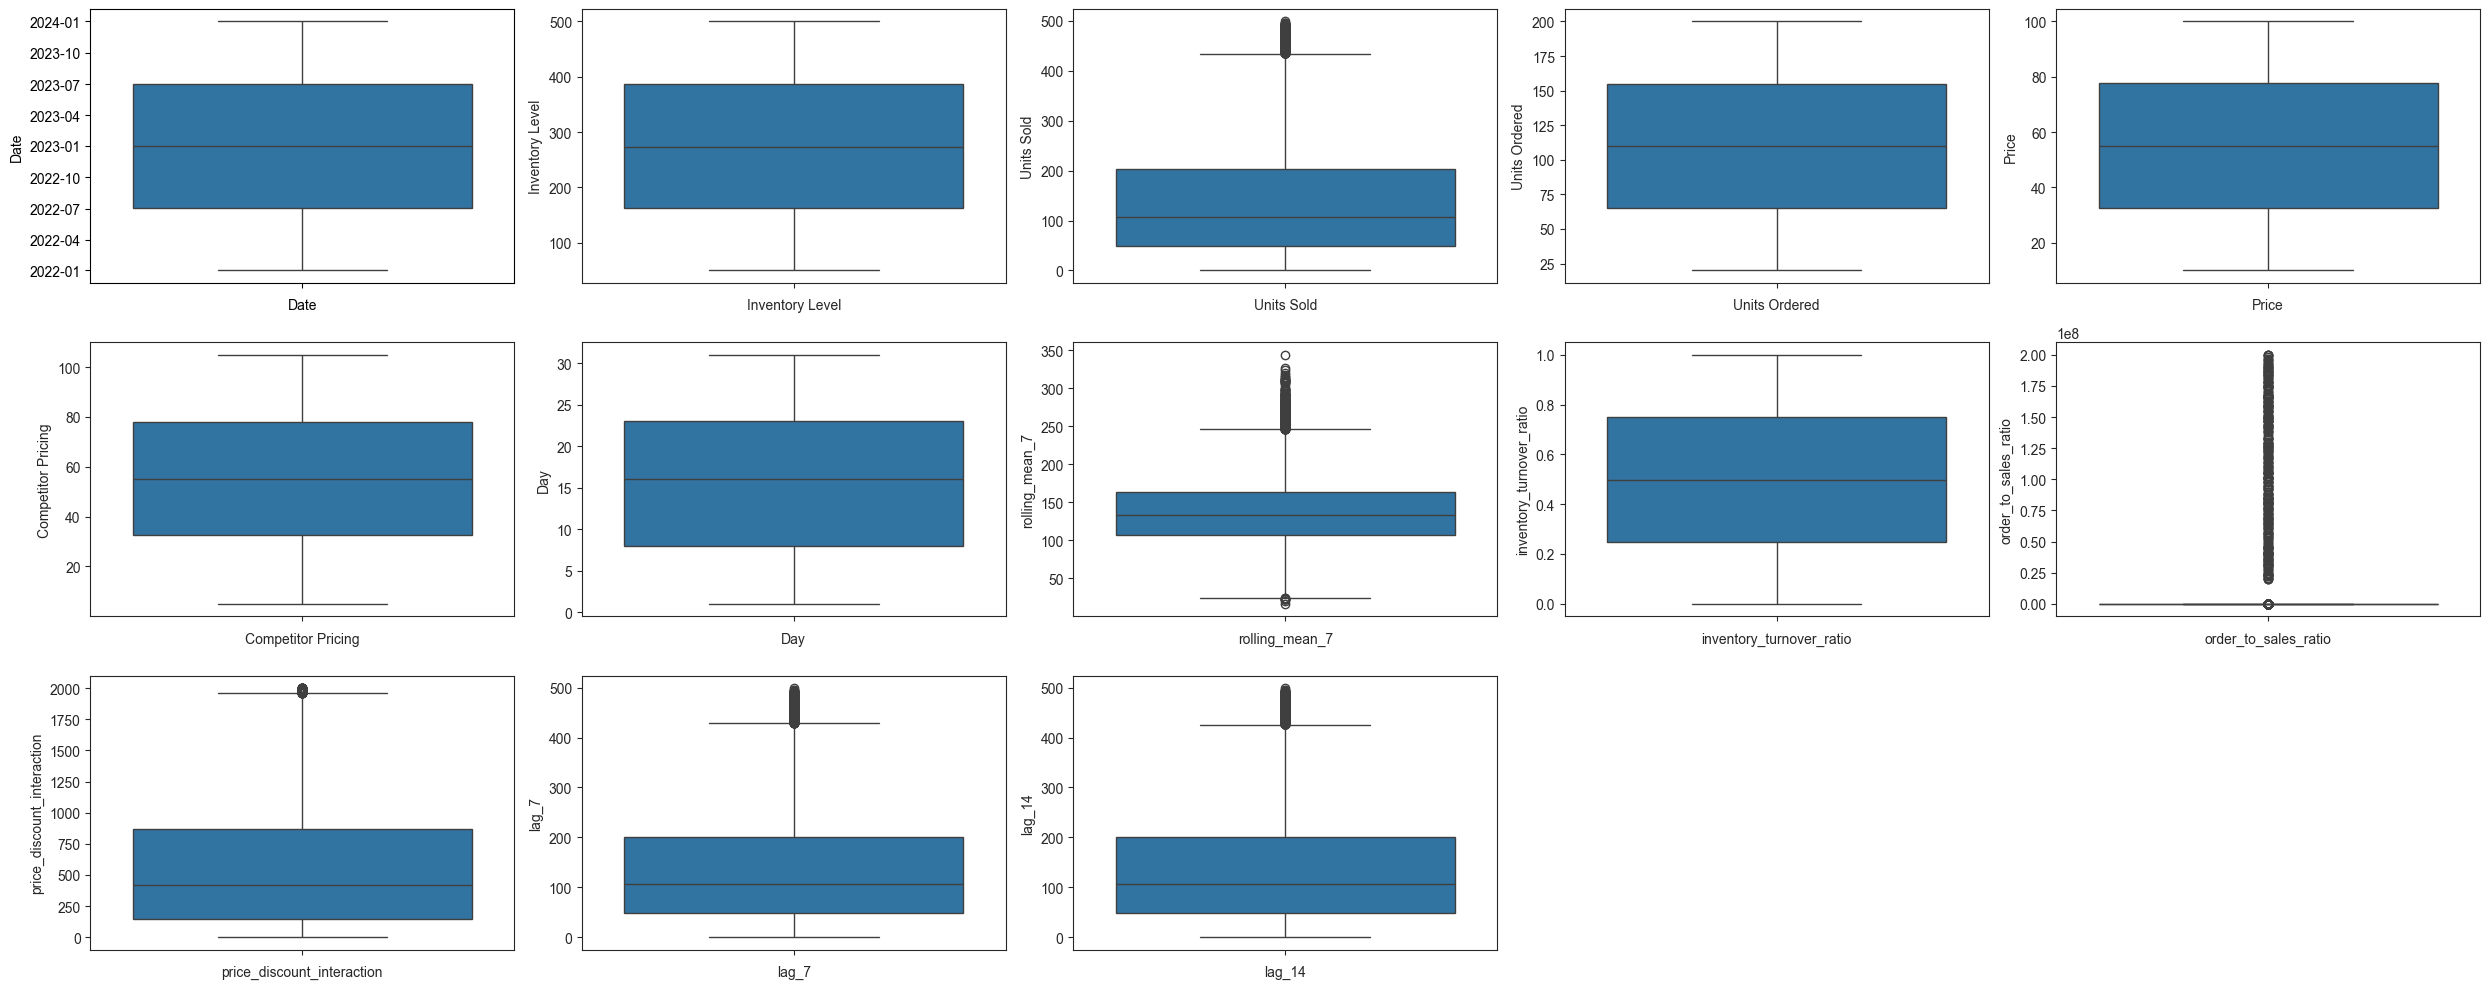

In [26]:
cont_features = continuous_features.copy()
plt.figure(figsize=(25, 10))

for i in range(len(cont_features)):
        plt.subplot(3, 5, i+1)  # 3 rows, 5 columns = 15 slots
        sns.set_style('ticks')
        plt.xlabel(cont_features[i])
        ax = sns.boxplot(df[cont_features[i]])

plt.tight_layout()
plt.show()

In [27]:
def cap_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower, upper)
    return df

num_cols = ['Units Sold', 'rolling_mean_7','order_to_sales_ratio','price_discount_interaction','lag_7', 'lag_14']

df = cap_outliers(df, num_cols)


In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 


In [29]:
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,...,Seasonality,Day,Month,Year,rolling_mean_7,inventory_turnover_ratio,order_to_sales_ratio,price_discount_interaction,lag_7,lag_14
0,2022-01-01,0,0,3,1,231,127,55,33.50,20,...,0,1,1,2022,134.000000,0.549784,0.433071,670.0,107.0,107.0
1,2022-01-01,0,1,4,2,204,150,66,63.01,20,...,0,1,1,2022,134.000000,0.735294,0.440000,1260.2,107.0,107.0
2,2022-01-01,0,2,4,3,102,65,51,27.99,10,...,2,1,1,2022,134.000000,0.637255,0.784615,279.9,107.0,107.0
3,2022-01-01,0,3,4,1,469,61,164,32.72,10,...,0,1,1,2022,134.000000,0.130064,2.688525,327.2,107.0,107.0
4,2022-01-01,0,4,1,0,166,14,135,73.64,0,...,2,1,1,2022,134.000000,0.084337,4.865346,0.0,107.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,2024-01-01,4,15,2,0,96,8,127,73.73,20,...,3,1,1,2024,86.000000,0.083333,4.865346,1474.6,43.0,230.0
73096,2024-01-01,4,16,4,1,313,51,101,82.57,10,...,0,1,1,2024,88.142857,0.162939,1.980392,825.7,119.0,288.0
73097,2024-01-01,4,17,0,3,278,36,151,11.11,10,...,3,1,1,2024,66.285714,0.129496,4.194444,111.1,5.0,54.0
73098,2024-01-01,4,18,4,0,374,264,21,53.14,20,...,1,1,1,2024,92.571429,0.705882,0.079545,1062.8,213.0,271.0


In [30]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
continuous_features.remove('Date')
df[continuous_features] = sc.fit_transform(df[continuous_features])

df['Discount'] = sc.fit_transform(df[['Discount']])

In [31]:
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,...,Seasonality,Day,Month,Year,rolling_mean_7,inventory_turnover_ratio,order_to_sales_ratio,price_discount_interaction,lag_7,lag_14
0,2022-01-01,0,0,3,1,0.402222,0.292627,0.194444,0.261111,1.0,...,0,0.0,1,2022,0.494537,0.549784,0.080921,0.341227,0.249417,0.250879
1,2022-01-01,0,1,4,2,0.342222,0.345622,0.255556,0.589000,1.0,...,0,0.0,1,2022,0.494537,0.735294,0.082358,0.641813,0.249417,0.250879
2,2022-01-01,0,2,4,3,0.115556,0.149770,0.172222,0.199889,0.5,...,2,0.0,1,2022,0.494537,0.637255,0.153818,0.142552,0.249417,0.250879
3,2022-01-01,0,3,4,1,0.931111,0.140553,0.800000,0.252444,0.5,...,0,0.0,1,2022,0.494537,0.130064,0.548613,0.166641,0.249417,0.250879
4,2022-01-01,0,4,1,0,0.257778,0.032258,0.638889,0.707111,0.0,...,2,0.0,1,2022,0.494537,0.084337,1.000000,0.000000,0.249417,0.250879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,2024-01-01,4,15,2,0,0.102222,0.018433,0.594444,0.708111,1.0,...,3,0.0,1,2024,0.278599,0.083333,1.000000,0.751006,0.100233,0.539273
73096,2024-01-01,4,16,4,1,0.584444,0.117512,0.450000,0.806333,0.5,...,0,0.0,1,2024,0.288239,0.162939,0.401775,0.420525,0.277389,0.675264
73097,2024-01-01,4,17,0,3,0.506667,0.082949,0.727778,0.012333,0.5,...,3,0.0,1,2024,0.189910,0.129496,0.860882,0.056583,0.011655,0.126612
73098,2024-01-01,4,18,4,0,0.720000,0.608295,0.005556,0.479333,1.0,...,1,0.0,1,2024,0.308162,0.705882,0.007614,0.541278,0.496503,0.635404


In [32]:
X=df.drop(['Units Sold','Date'],axis=1)

In [33]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                       feature         VIF
0                     Store ID    3.001201
1                   Product ID    3.715840
2                     Category    3.003555
3                       Region    2.794848
4              Inventory Level    6.392340
5                Units Ordered    5.758767
6                        Price  337.470554
7                     Discount   16.492127
8            Weather Condition    2.801965
9            Holiday/Promotion    1.989635
10          Competitor Pricing  383.357134
11                 Seasonality    2.807647
12                         Day    3.788199
13                       Month    4.569922
14                        Year   71.119483
15              rolling_mean_7   10.165105
16    inventory_turnover_ratio   10.252597
17        order_to_sales_ratio    7.358215
18  price_discount_interaction   16.514424
19                       lag_7    3.022697
20                      lag_14    2.602443


In [34]:
X=X.drop('Competitor Pricing',axis=1)

In [35]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                       feature        VIF
0                     Store ID   3.000833
1                   Product ID   3.715815
2                     Category   3.003511
3                       Region   2.794842
4              Inventory Level   6.392207
5                Units Ordered   5.758764
6                        Price  12.058192
7                     Discount  16.492124
8            Weather Condition   2.801953
9            Holiday/Promotion   1.989607
10                 Seasonality   2.807644
11                         Day   3.788186
12                       Month   4.569854
13                        Year  68.300269
14              rolling_mean_7  10.165092
15    inventory_turnover_ratio  10.252425
16        order_to_sales_ratio   7.358078
17  price_discount_interaction  16.514331
18                       lag_7   3.022688
19                      lag_14   2.602367


In [36]:
df['Price']=df['Price']+df['Competitor Pricing']  / 2

In [37]:
df.drop('Competitor Pricing',axis=1,inplace=True)

In [38]:
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,...,Seasonality,Day,Month,Year,rolling_mean_7,inventory_turnover_ratio,order_to_sales_ratio,price_discount_interaction,lag_7,lag_14
0,2022-01-01,0,0,3,1,0.402222,0.292627,0.194444,0.384522,1.0,...,0,0.0,1,2022,0.494537,0.549784,0.080921,0.341227,0.249417,0.250879
1,2022-01-01,0,1,4,2,0.342222,0.345622,0.255556,0.894925,1.0,...,0,0.0,1,2022,0.494537,0.735294,0.082358,0.641813,0.249417,0.250879
2,2022-01-01,0,2,4,3,0.115556,0.149770,0.172222,0.331457,0.5,...,2,0.0,1,2022,0.494537,0.637255,0.153818,0.142552,0.249417,0.250879
3,2022-01-01,0,3,4,1,0.931111,0.140553,0.800000,0.401128,0.5,...,0,0.0,1,2022,0.494537,0.130064,0.548613,0.166641,0.249417,0.250879
4,2022-01-01,0,4,1,0,0.257778,0.032258,0.638889,1.026999,0.0,...,2,0.0,1,2022,0.494537,0.084337,1.000000,0.000000,0.249417,0.250879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,2024-01-01,4,15,2,0,0.102222,0.018433,0.594444,1.045515,1.0,...,3,0.0,1,2024,0.278599,0.083333,1.000000,0.751006,0.100233,0.539273
73096,2024-01-01,4,16,4,1,0.584444,0.117512,0.450000,1.200438,0.5,...,0,0.0,1,2024,0.288239,0.162939,0.401775,0.420525,0.277389,0.675264
73097,2024-01-01,4,17,0,3,0.506667,0.082949,0.727778,0.041760,0.5,...,3,0.0,1,2024,0.189910,0.129496,0.860882,0.056583,0.011655,0.126612
73098,2024-01-01,4,18,4,0,0.720000,0.608295,0.005556,0.733412,1.0,...,1,0.0,1,2024,0.308162,0.705882,0.007614,0.541278,0.496503,0.635404


In [39]:
import os 
os.makedirs('../models', exist_ok=True)

In [40]:
import joblib
joblib.dump(sc, '../models/minmax.pkl')
joblib.dump(label_encoders,'../models/label_encoder.pkl')

['../models/label_encoder.pkl']

In [41]:
df.to_csv('../data/final_df.csv', index=False)

In [42]:
#Optimize Inventory 

df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount',
       'Weather Condition', 'Holiday/Promotion', 'Seasonality', 'Day', 'Month',
       'Year', 'rolling_mean_7', 'inventory_turnover_ratio',
       'order_to_sales_ratio', 'price_discount_interaction', 'lag_7',
       'lag_14'],
      dtype='object')

In [43]:
df.isnull().sum()

Date                          0
Store ID                      0
Product ID                    0
Category                      0
Region                        0
Inventory Level               0
Units Sold                    0
Units Ordered                 0
Price                         0
Discount                      0
Weather Condition             0
Holiday/Promotion             0
Seasonality                   0
Day                           0
Month                         0
Year                          0
rolling_mean_7                0
inventory_turnover_ratio      0
order_to_sales_ratio          0
price_discount_interaction    0
lag_7                         0
lag_14                        0
dtype: int64